In [1]:
import seaborn as sns

In [2]:
import MDAnalysis
import MDAnalysis.analysis.leaflet
import pandas as pd

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [4]:
def bilayer_thickness (A, B) : # finds the bilayer thickness from a file or universe input
	downP = B.groups(0)
	upP = B.groups(1)
	upPxyz = upP.positions
	upPz = upPxyz[:,2] #selects z coordinates
	upPz_av = np.mean(upPz)
	downPxyz = downP.positions
	downPz = downPxyz[:,2] 
	downPz_av = np.mean(downPz)
	bilayer_thickness = downPz_av - upPz_av #difference in average upper and lower z coordinates
	return (bilayer_thickness)

def dif (A):
    u = MDAnalysis.Universe(A)
    protein = u.select_atoms('protein')
    L = u.select_atoms('name P*')
    proCOM = protein.center_of_mass()
    memCOM = L.center_of_mass()
    dif = memCOM[2] - proCOM[2]
    return dif

def meandif (A, B):
    u = MDAnalysis.Universe(A, B)
    protein = u.select_atoms('protein')
    L = u.select_atoms('name P*')
    meanrun = []
    for ts in u.trajectory:
        proCOM = protein.center_of_mass()
        memCOM = L.center_of_mass()
        meanrun.append(memCOM[2] - proCOM[2])
    dif = np.mean(meanrun[25:75])
    return dif

In [21]:
u1 = MDAnalysis.Universe('../../DFPC/Backwards/md/1bar/analysis/mdord.pdb', '../../DFPC/Backwards/md/1bar/analysis/md-c.xtc')
L1 = MDAnalysis.analysis.leaflet.LeafletFinder(u1, 'name P*')

bilayer1 = []

for ts in u1.trajectory :
	bilayer1.append(bilayer_thickness(u1, L1))

mean1 = np.mean(bilayer1[25:75])


In [15]:
test.positions

array([[ 6.13300018e+01,  3.38500023e+01,  3.12300014e+01],
       [ 1.02400009e+02,  9.03000031e+01,  3.69599991e+01],
       [ 7.73700027e+01,  6.77800064e+01,  3.56600037e+01],
       [ 9.68600082e+01,  1.44400015e+01,  3.23600006e+01],
       [ 6.88500061e+01,  4.24800034e+01,  3.45800018e+01],
       [ 5.71100044e+01,  2.98200016e+01,  3.27800026e+01],
       [ 1.08170006e+02,  3.17000008e+01,  3.69900017e+01],
       [ 8.69000092e+01,  8.21699982e+01,  3.66300011e+01],
       [ 3.22400017e+01,  1.15100002e+01,  3.56300011e+01],
       [ 5.71599998e+01,  9.14000015e+01,  4.10499992e+01],
       [ 1.02720001e+02,  3.41500015e+01,  3.50400009e+01],
       [ 2.71100025e+01,  8.88400116e+01,  4.11500015e+01],
       [ 7.38300018e+01,  7.81000061e+01,  4.21100006e+01],
       [ 1.20800009e+01,  9.20000076e+01,  3.15699997e+01],
       [ 1.93100014e+01,  3.81500015e+01,  3.88600006e+01],
       [ 5.45999985e+01,  7.98600082e+01,  4.30299988e+01],
       [ 9.04000092e+00,  1.90800018e+01

In [5]:
# BILAYER THICKNESS

##### DFPC
### 1b

u1 = MDAnalysis.Universe('../../DFPC/Backwards/md/1bar/analysis/mdord.pdb', '../../DFPC/Backwards/md/1bar/analysis/md-c.xtc')
L1 = MDAnalysis.analysis.leaflet.LeafletFinder(u1, 'name P*')

bilayer1 = []

for ts in u1.trajectory :
	bilayer1.append(bilayer_thickness(u1, L1))

mean1 = np.mean(bilayer1[25:75])

u2 = MDAnalysis.Universe('../../DFPC/Backwards/md/1bar/repeat/analysis/mdord.pdb', '../../DFPC/Backwards/md/1bar/repeat/analysis/md-c.xtc')
L2 = MDAnalysis.analysis.leaflet.LeafletFinder(u2, 'name P*')

bilayer2 = []

for ts in u2.trajectory :
	bilayer2.append(bilayer_thickness(u2, L2))

mean2 = np.mean(bilayer2[25:75])

av1 = (mean1+mean2)/2

### -30b

u3 = MDAnalysis.Universe('../../DFPC/Backwards/md/30bar/repeat1/analysis/mdord.pdb', '../../DFPC/Backwards/md/30bar/repeat1/analysis/md-c.xtc')
L3 = MDAnalysis.analysis.leaflet.LeafletFinder(u3, 'name P*')

bilayer3 = []

for ts in u3.trajectory :
	bilayer3.append(bilayer_thickness(u3, L3))

mean3 = np.mean(bilayer3[25:75])

u4 = MDAnalysis.Universe('../../DFPC/Backwards/md/30bar/repeat2/analysis/mdord.pdb', '../../DFPC/Backwards/md/30bar/repeat2/analysis/md-c.xtc')
L4 = MDAnalysis.analysis.leaflet.LeafletFinder(u4, 'name P*')

bilayer4 = []

for ts in u4.trajectory :
	bilayer4.append(bilayer_thickness(u4, L4))

mean4 = np.mean(bilayer4[25:75])

av2 = (mean3+mean4)/2

### -40b

bilayer5 = []

u5 = MDAnalysis.Universe('../../DFPC/Backwards/md/40bar/repeat1/analysis/mdord.pdb', '../../DFPC/Backwards/md/40bar/repeat1/analysis/md-c.xtc')
L5 = MDAnalysis.analysis.leaflet.LeafletFinder(u5, 'name P*') #selects P atoms and puts in two leaflet

for ts in u5.trajectory :
	bilayer5.append(bilayer_thickness(u5, L5))

mean5 = np.mean(bilayer5[25:75])

bilayer6 = []

u6 = MDAnalysis.Universe('../../DFPC/Backwards/md/40bar/repeat2/analysis/mdord.pdb', '../../DFPC/Backwards/md/40bar/repeat2/analysis/md-c.xtc')
L6 = MDAnalysis.analysis.leaflet.LeafletFinder(u6, 'name P*') #selects P atoms and puts in two leaflet

for ts in u6.trajectory :
	bilayer6.append(bilayer_thickness(u6, L6))

mean6 = np.mean(bilayer6[25:75])

bilayer7 = []

u7 = MDAnalysis.Universe('../../DFPC/Backwards/md/40bar/repeat3/analysis/mdord.pdb', '../../DFPC/Backwards/md/40bar/repeat3/analysis/md-c.xtc')
L7 = MDAnalysis.analysis.leaflet.LeafletFinder(u7, 'name P*') #selects P atoms and puts in two leaflet

for ts in u7.trajectory :
	bilayer7.append(bilayer_thickness(u7, L7))

mean7 = np.mean(bilayer7[25:75])

av3 = (mean5 + mean6 + mean7)/3

##### DOPC
### 1b

u8 = MDAnalysis.Universe('../../DOPC/Backwards/md/1bar/analysis/mdord.pdb', '../../DOPC/Backwards/md/1bar/analysis/md-c.xtc')
L8 = MDAnalysis.analysis.leaflet.LeafletFinder(u8, 'name P*')

bilayer8 = []

for ts in u8.trajectory :
	bilayer8.append(bilayer_thickness(u8, L8))

mean8 = np.mean(bilayer8[25:75])

u9 = MDAnalysis.Universe('../../DOPC/Backwards/md/1bar/repeat/analysis/mdord.pdb', '../../DOPC/Backwards/md/1bar/repeat/analysis/md-c.xtc')
L9 = MDAnalysis.analysis.leaflet.LeafletFinder(u9, 'name P*')

bilayer9 = []

for ts in u9.trajectory :
	bilayer9.append(bilayer_thickness(u9, L9))

mean9 = np.mean(bilayer9[25:75])

av4 = (mean8+mean9)/2

### -30b

u10 = MDAnalysis.Universe('../../DOPC/Backwards/md/30bar/repeat1/analysis/mdord.pdb', '../../DOPC/Backwards/md/30bar/repeat1/analysis/md-c.xtc')
L10 = MDAnalysis.analysis.leaflet.LeafletFinder(u10, 'name P*')

bilayer10 = []

for ts in u10.trajectory :
	bilayer10.append(bilayer_thickness(u10, L10))

mean10 = np.mean(bilayer10[25:75])

u11 = MDAnalysis.Universe('../../DOPC/Backwards/md/30bar/repeat2/analysis/mdord.pdb', '../../DOPC/Backwards/md/30bar/repeat2/analysis/md-c.xtc')
L11 = MDAnalysis.analysis.leaflet.LeafletFinder(u11, 'name P*')

bilayer11 = []

for ts in u11.trajectory :
	bilayer11.append(bilayer_thickness(u11, L11))

mean11 = np.mean(bilayer11[25:75])

av5 = (mean10+mean11)/2

### -40b

bilayer12 = []

u12 = MDAnalysis.Universe('../../DOPC/Backwards/md/40bar/repeat1/analysis/mdord.pdb', '../../DOPC/Backwards/md/40bar/repeat1/analysis/md-c.xtc')
L12 = MDAnalysis.analysis.leaflet.LeafletFinder(u12, 'name P*') #selects P atoms and puts in two leaflet

for ts in u12.trajectory :
	bilayer12.append(bilayer_thickness(u12, L12))

mean12 = np.mean(bilayer12[25:75])

bilayer13 = []

u13 = MDAnalysis.Universe('../../DOPC/Backwards/md/40bar/repeat2/analysis/mdord.pdb', '../../DOPC/Backwards/md/40bar/repeat2/analysis/md-c.xtc')
L13 = MDAnalysis.analysis.leaflet.LeafletFinder(u13, 'name P*') #selects P atoms and puts in two leaflet

for ts in u13.trajectory :
	bilayer13.append(bilayer_thickness(u13, L13))

mean13 = np.mean(bilayer13[25:75])

bilayer14 = []

u14 = MDAnalysis.Universe('../../DOPC/Backwards/md/40bar/repeat3/analysis/mdord.pdb', '../../DOPC/Backwards/md/40bar/repeat3/analysis/md-c.xtc')
L14 = MDAnalysis.analysis.leaflet.LeafletFinder(u14, 'name P*') #selects P atoms and puts in two leaflet

for ts in u14.trajectory :
	bilayer14.append(bilayer_thickness(u14, L14))

mean14 = np.mean(bilayer14[25:75])

av6 = (mean12 + mean13 + mean14)/3

### -50b

u15 = MDAnalysis.Universe('../../DOPC/Backwards/md/50bar/repeat1/analysis/mdord.pdb', '../../DOPC/Backwards/md/50bar/repeat1/analysis/md-c.xtc')
L15 = MDAnalysis.analysis.leaflet.LeafletFinder(u15, 'name P*')

bilayer15 = []

for ts in u15.trajectory :
	bilayer15.append(bilayer_thickness(u15, L15))

mean15 = np.mean(bilayer15[25:75])

u16 = MDAnalysis.Universe('../../DOPC/Backwards/md/50bar/repeat2/analysis/mdord.pdb', '../../DOPC/Backwards/md/50bar/repeat2/analysis/md-c.xtc')
L16 = MDAnalysis.analysis.leaflet.LeafletFinder(u16, 'name P*')

bilayer16 = []

for ts in u16.trajectory :
	bilayer16.append(bilayer_thickness(u16, L16))

mean16 = np.mean(bilayer16[25:75])

av7 = (mean15+mean16)/2

##### DVPC
### 1b

u17 = MDAnalysis.Universe('../../DVPC/Backwards/md/1bar/analysis/mdord.pdb', '../../DVPC/Backwards/md/1bar/analysis/md-c.xtc')
L17 = MDAnalysis.analysis.leaflet.LeafletFinder(u17, 'name P*')

bilayer17 = []

for ts in u17.trajectory :
	bilayer17.append(bilayer_thickness(u17, L17))

mean17 = np.mean(bilayer17[25:75])

u18 = MDAnalysis.Universe('../../DVPC/Backwards/md/1bar/repeat/analysis/mdord.pdb', '../../DVPC/Backwards/md/1bar/repeat/analysis/md-c.xtc')
L18 = MDAnalysis.analysis.leaflet.LeafletFinder(u18, 'name P*')

bilayer18 = []

for ts in u18.trajectory :
	bilayer18.append(bilayer_thickness(u18, L18))

mean18 = np.mean(bilayer18[25:75])

av8 = (mean17+mean18)/2

### -40b

bilayer19 = []

u19 = MDAnalysis.Universe('../../DVPC/Backwards/md/40bar/repeat1/analysis/mdord.pdb', '../../DVPC/Backwards/md/40bar/repeat1/analysis/md-c.xtc')
L19 = MDAnalysis.analysis.leaflet.LeafletFinder(u19, 'name P*') #selects P atoms and puts in two leaflet

for ts in u19.trajectory :
	bilayer19.append(bilayer_thickness(u19, L19))

mean19 = np.mean(bilayer19[25:75])

bilayer20 = []

u20 = MDAnalysis.Universe('../../DVPC/Backwards/md/40bar/repeat2/analysis/mdord.pdb', '../../DVPC/Backwards/md/40bar/repeat2/analysis/md-c.xtc')
L20 = MDAnalysis.analysis.leaflet.LeafletFinder(u20, 'name P*') #selects P atoms and puts in two leaflet

for ts in u20.trajectory :
	bilayer20.append(bilayer_thickness(u20, L20))

mean20 = np.mean(bilayer20[25:75])

bilayer21 = []

u21 = MDAnalysis.Universe('../../DVPC/Backwards/md/40bar/repeat3/analysis/mdord.pdb', '../../DVPC/Backwards/md/40bar/repeat3/analysis/md-c.xtc')
L21 = MDAnalysis.analysis.leaflet.LeafletFinder(u21, 'name P*') #selects P atoms and puts in two leaflet

for ts in u21.trajectory :
	bilayer21.append(bilayer_thickness(u21, L21))

mean21 = np.mean(bilayer21[25:75])

av9 = (mean19 + mean20 + mean21)/3

### -50b

u22 = MDAnalysis.Universe('../../DVPC/Backwards/md/50bar/repeat1/analysis/mdord.pdb', '../../DVPC/Backwards/md/50bar/repeat1/analysis/md-c.xtc')
L22 = MDAnalysis.analysis.leaflet.LeafletFinder(u22, 'name P*')

bilayer22 = []

for ts in u22.trajectory :
	bilayer22.append(bilayer_thickness(u22, L22))

mean22 = np.mean(bilayer22[25:75])

u23 = MDAnalysis.Universe('../../DVPC/Backwards/md/50bar/repeat2/analysis/mdord.pdb', '../../DVPC/Backwards/md/50bar/repeat2/analysis/md-c.xtc')
L23 = MDAnalysis.analysis.leaflet.LeafletFinder(u23, 'name P*')

bilayer23 = []

for ts in u23.trajectory :
	bilayer23.append(bilayer_thickness(u23, L23))

mean23 = np.mean(bilayer23[25:75])

av10 = (mean22+mean23)/2

### -60b

u24 = MDAnalysis.Universe('../../DVPC/Backwards/md/60bar/repeat1/analysis/mdord.pdb', '../../DVPC/Backwards/md/60bar/repeat1/analysis/md-c.xtc')
L24 = MDAnalysis.analysis.leaflet.LeafletFinder(u24, 'name P*')

bilayer24 = []

for ts in u24.trajectory :
	bilayer24.append(bilayer_thickness(u24, L24))

mean24 = np.mean(bilayer24[25:75])

u25 = MDAnalysis.Universe('../../DVPC/Backwards/md/60bar/repeat2/analysis/mdord.pdb', '../../DVPC/Backwards/md/60bar/repeat2/analysis/md-c.xtc')
L25 = MDAnalysis.analysis.leaflet.LeafletFinder(u25, 'name P*')

bilayer25 = []

for ts in u25.trajectory :
	bilayer25.append(bilayer_thickness(u25, L25))

mean25 = np.mean(bilayer25[25:75])

av11 = (mean24+mean25)/2

In [6]:
dfpc = []
dfpc.append([mean1, mean2, mean3, mean4, mean5, mean6, mean7])

In [112]:
dfpc

[[35.119293, 35.241188, 31.146101, 31.278418, 29.725508, 29.884663, 29.922606]]

In [7]:
dopc = []
dopc.append([mean8, mean9, mean10, mean11, mean12, mean13, mean14, mean15, mean16])

In [8]:
dvpc = []
dvpc.append([mean17, mean18, mean19, mean20, mean21, mean22, mean23, mean24, mean25])

In [9]:
data = np.concatenate((dfpc, dopc, dvpc))
data

ValueError: all the input array dimensions except for the concatenation axis must match exactly

In [54]:
one = []
one.append((mean1, mean8, mean17))

two = []
two.append((mean1, mean9, mean18))

three = []
three.append((mean3, mean10, mean19))

four = []
four.append((mean4, mean11, mean20))

five = []
five.append((mean4, mean12, mean21))

six = []
six.append((mean5, mean13, mean22))

seven = []
seven.append((mean6, mean14, mean23))

eight = []
eight.append((mean7, mean15, mean24))

nine = []
nine.append((mean7, mean16, mean25))

In [55]:
dataa = np.concatenate((one, two, three, four, five, six, seven, eight, nine))

{'boxes': [<matplotlib.lines.Line2D at 0x7f74db44f790>,
 'caps': [<matplotlib.lines.Line2D at 0x7f74db44ffd0>,
 'fliers': [],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f74db457710>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f74db44f850>,
  <matplotlib.lines.Line2D at 0x7f74db3d92d0>]}

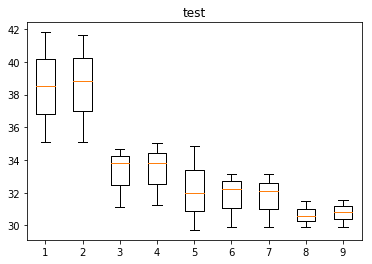

In [62]:
fig1, ax1 = plt.subplots()
ax1.set_title('test')
ax1.boxplot(data, showfliers = False)

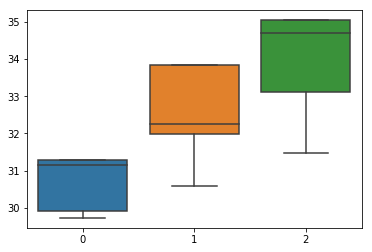

In [61]:
sns.boxplot(data=dataa, showfliers = False)

In [64]:
print dfpc
print dopc
print dvpc

[(35.119293, 35.119293, 31.146101, 31.278418, 29.725508, 29.884663, 29.922606, 29.922606, 29.922606)]
[(38.54551, 38.826458, 33.846046, 33.80227, 31.986378, 32.257378, 32.11578, 30.59513, 30.804432)]
[(41.816753, 41.66891, 34.695484, 35.044323, 34.843468, 33.156464, 33.12427, 31.474575, 31.572884)]


In [10]:
dfpc = np.squeeze(dfpc)
s = pd.Series(dfpc, name = 'DFPC')

In [11]:
dopc = np.squeeze(dopc)
t = pd.Series(dopc, name = 'DOPC')

In [12]:
dvpc = np.squeeze(dvpc)
v = pd.Series(dvpc, name = 'DVPC')

In [13]:
d = {'DFPC': s, 'DOPC': t, 'DVPC': v}
df = pd.DataFrame(d)

In [14]:
df

,DFPC,DOPC,DVPC
0,35.119293,38.545509,41.816753
1,35.241188,38.826458,41.668911
2,31.146101,33.846046,34.695484
3,31.278418,33.802269,35.044323
4,29.725508,31.986378,34.843468
5,29.884663,32.257378,33.156464
6,29.922606,32.115780,33.124271
7,NaN,30.595131,31.474575
8,NaN,30.804432,31.572884


/sansom/s150/pemb4066/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0,0.5,'Bilayer Thickness')

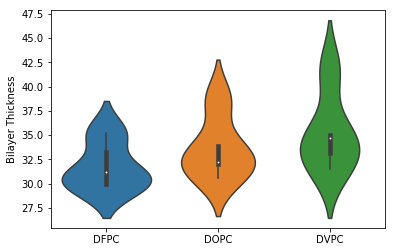

In [16]:
sns.violinplot(data=df)
plt.ylabel('Bilayer Thickness')

In [122]:
d = {'16:1 $\Delta$9-cis': s, '18:1 $\Delta$9-cis': t, '20:1 $\Delta$9-cis': v}
df = pd.DataFrame(d)

Text(0.5,0,'Lipid Species')

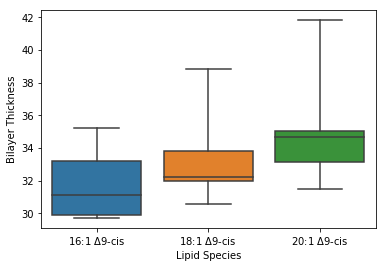

In [123]:
sns.boxplot(data=df, whis = 100)
plt.ylabel('Bilayer Thickness')
plt.xlabel('Lipid Species')
